In [51]:
from datetime import datetime, timezone
import numpy as np
from matplotlib import pyplot as plt

from models.time_series_composer import TimeSeriesComposer
from models.time_series_generator import TimeSeriesGenerator

In [52]:
from_utc = datetime(2025, 4, 10, tzinfo=timezone.utc)
to_utc = datetime(2025, 4, 16, tzinfo=timezone.utc)
generator = TimeSeriesGenerator(from_utc, to_utc, '1h')

In [53]:
#df = generator.generate(lambda x : x)
b = 12.1
w = 0.5
df = generator.generate(lambda x : x * w + b * np.random.normal(loc=0.0, scale=8.0), col_name="price")
#df

In [54]:
resampled_1h = df.resample("6h").first()
#df = TimeSeriesComposer.shift_column(df, col_name="price", count=4)

df

,price
2025-04-10 00:00:00+00:00,40.743593
2025-04-10 01:00:00+00:00,41.243593
2025-04-10 02:00:00+00:00,41.743593
2025-04-10 03:00:00+00:00,42.243593
2025-04-10 04:00:00+00:00,42.743593
...,...
2025-04-15 20:00:00+00:00,110.743593
2025-04-15 21:00:00+00:00,111.243593
2025-04-15 22:00:00+00:00,111.743593
2025-04-15 23:00:00+00:00,112.243593


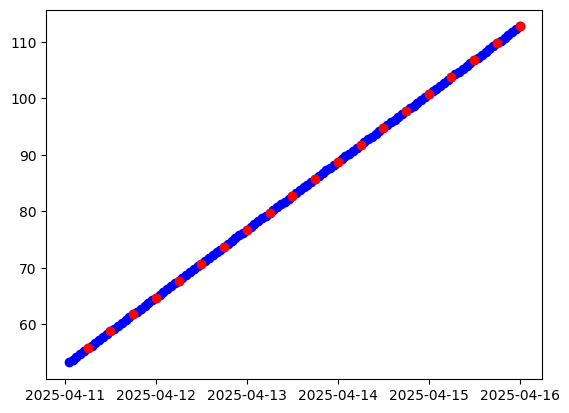

In [55]:
plt.scatter(df.tail(120).index, df.tail(120), label="seq", color="b")
plt.scatter(resampled_1h.tail(20).index, resampled_1h.tail(20), label="close", color="r")